In [12]:
import numpy as np
import pandas as pd
from keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import tensorflow as tf
import matplotlib.pyplot as plt

In [41]:
import os
"""print(os.path.realpath("__file__"))
print(os.path.abspath("__file__"))
print(os.path.dirname(os.path.realpath("__file__")))"""
path = os.path.dirname(os.path.realpath("__file__"))
print(path)

C:\Users\Mule129\Documents\GitHub\practicePJ\20221122_ss_PJ


In [26]:
import os
print(os.listdir(os.getcwd()))
print(os.getcwd())

['AllData.csv', 'DataFit.py', 'DataFit_jupyter.ipynb', 'practicePJ', 'save_model', '육군 신체측정정보.csv']
c:\Users\Mule129\Documents\GitHub\practicePJ\20221122_ss_PJ


In [13]:
with open(path+r"\육군 신체측정정보.csv", "r", ) as file:
    data = pd.read_csv(file)
    #print(data)
train_data = data.to_numpy()
x_data, y_data = [], []
for i in train_data:
    x_data.append(i[:7])
    y_data.append(i[7])
train_data = np.array(x_data)
test_data = np.array(y_data)
print(train_data.shape, test_data.shape)

(135668, 7) (135668,)


In [14]:

nmr = Normalizer().fit(x_data)
t = nmr.transform(x_data)
x_data = t

train_x, test_x, train_y, test_y = train_test_split(train_data, test_data, random_state=1)

In [15]:
model = Sequential()
model.add(layers.Input(7))
model.add(layers.Flatten())
#model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 7)                 0         
                                                                 
 dense_10 (Dense)            (None, 64)                512       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 4)                 68        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,193
Trainable params: 3,193
Non-traina

In [ ]:
model.compile(optimizer='RMSprop',loss='mae')
history = model.fit(train_x, train_y, epochs=100, batch_size=128)

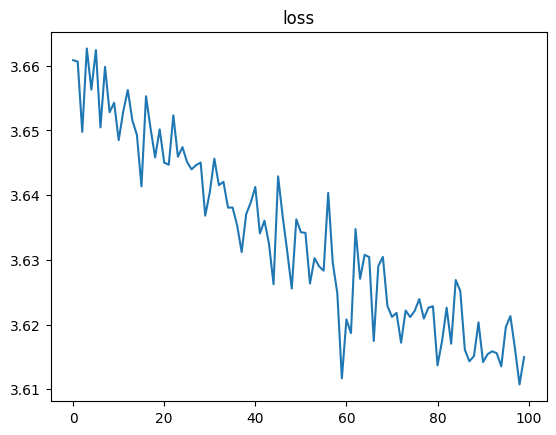

In [65]:
plt.plot(history.history["loss"])
plt.title("loss")
plt.show()

In [61]:
data = model.predict(test_x[:10])
print(data)
test_y = test_y[:10]

for i in range(len(test_y)):
    t = abs(data[i] - test_y[i])
    print(t, end = ", ")
#history = model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

1/1 [==============================] - 0s 52ms/step
[[57.502342]
 [86.38432 ]
 [64.1197  ]
 [47.972523]
 [60.220684]
 [78.785355]
 [87.82425 ]
 [57.044296]
 [61.86534 ]
 [95.389046]]
[4.6976585], [3.3156738], [2.1196976], [2.9274788], [1.4206848], [3.885353], [1.3757477], [1.8557053], [0.8346596], [1.5109558], 

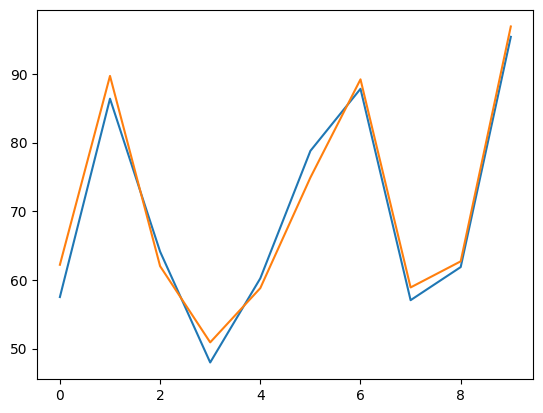

In [64]:
plt.plot(data)
plt.plot(test_y)
plt.show()

In [63]:
model.save(path+r"\save_model\model_1.h5")